# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

**Explain how you solve the model**

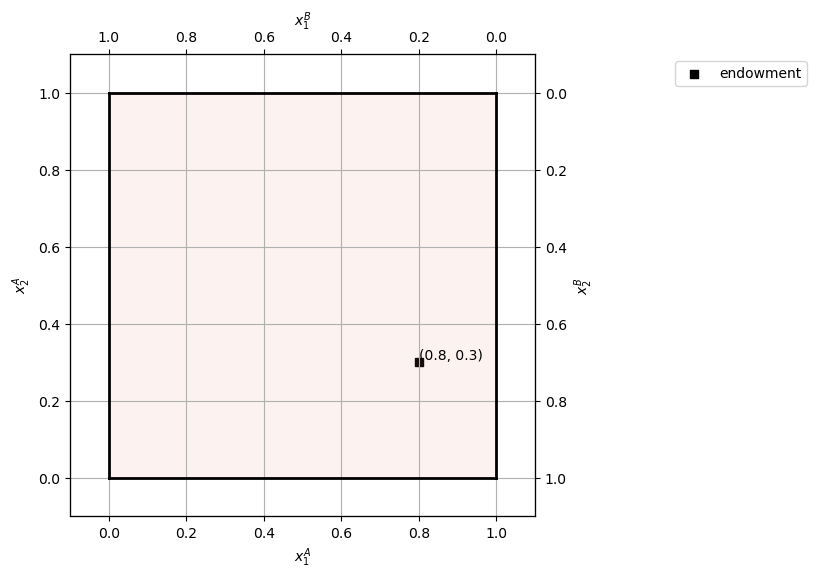

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#defined variables and equasions

def omega1B(omega1A):
    return 1 - omega1A

def omega2B(omega2A):
    return 1 - omega2A

#preferences
alpha = 1/3
beta = 2/3

#endowment
omega1A = 0.8
omega2A = 0.3


#utility functions
def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B, beta):
    return x1B**beta * x2B**(1-beta)

#demand functions
def demand_1A(p1, p2, omega1A, omega2A):
    return alpha * ((p1 * omega1A + p2 * omega2A)/p1)

def demand_2A(p1, p2, omega1A, omega2A):
    return (1-alpha)((p1 * omega1A + p2 * omega2A)/p2)

def demand_1B(p1, p2, omega1B, omega2B):
    return beta((p1*omega1B + p2*omega2B)/p1)

def demand_2B(p1, p2, omega1B, omega2B):
    return (1-beta)(p1 * omega1B + p2 * omega2B)/p2

#market clearing
def check_market_clearing1(alpha, p1, p2, omega1A, omega1B):
    return demand_1A(p1, p2, omega1A, omega2A) + demand_1B(p1, p2, omega1B, omega2B) == omega1A + omega1B
def check_market_clearing2(beta, p1, p2, omega2A, omega2B):
    return demand_2A(p1, p2, omega1A, omega2A) + demand_2B(p1, p2, omega1B, omega2B) == omega2A + omega2B

def eps1(demand_1A, omega1A, demand_1B, omega1B):
    return demand_1A(p1, p2, omega1A, omega2A) - omega1A + demand_1B(p1, p2, omega1B, omega2B) - omega1B
def eps2(demand_2A, omega2A, demand_2B, omega2B):
    return demand_2A(p1, p2, omega1A, omega2A) - omega2A + demand_2B(p1, p2, omega1B, omega2B) - omega2B
  

#task 1
import numpy as np
import matplotlib.pyplot as plt

# a. total endowment
omega1bar = 1.0
omega2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

#endowment
omega1A = 0.8
omega2A = 0.3

# A
ax_A.scatter(omega1A,omega2A,marker='s',color='black',label='endowment')
ax_A.text(omega1A, omega2A, f'({omega1A}, {omega2A})', verticalalignment='bottom')

# limits
ax_A.plot([0,omega1bar],[0,0],lw=2,color='black')
ax_A.plot([0,omega1bar],[omega2bar,omega2bar],lw=2,color='black')
ax_A.plot([0,0],[0,omega2bar],lw=2,color='black')
ax_A.plot([omega1bar,omega1bar],[0,omega2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

# Mesh
x = np.linspace(0, omega1bar, 10)
y = np.linspace(0, omega2bar, 10)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

ax_A.contourf(X, Y, Z, 20, cmap='RdGy', alpha=0.1)

# Scale
ax_A.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_A.set_yticks(np.arange(0, omega2bar+0.1, 0.2))
ax_B.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_B.set_yticks(np.arange(0, omega2bar+0.1, 0.2))



ax_A.grid(True)

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

In [ ]:

print(omega1A)
print(omega1B)



0.8
<function omega1B at 0x0000029AAE6A6D40>


# Question 2

Explain your code and procedure

In [42]:
class ExtendedExchangeEconomy(ExchangeEconomyClass):

    def cal_market_clearing_errors(self, p1_values):
    
        errors = []
        for p1 in p1_values:
            eps1, eps2 = self.check_market_clearing(p1)
            errors.append((eps1, eps2))
        return np.array(errors)

    def market_clearing_price(self, p1_values):
        """Find the p1 value that minimizes the sum of absolute market clearing errors."""
        errors = self.cal_market_clearing_errors(p1_values)
        absolute_errors = np.sum(np.abs(errors), axis=1)
        min_error_index = np.argmin(absolute_errors)
        return p1_values[min_error_index], errors[min_error_index]

# Define the range of prices p1
P1 = np.linspace(0.5, 2.5, 75)

# Create an instance of the extended exchange economy class
extended_economy = ExtendedExchangeEconomy()

# Calculate market clearing errors for the range of p1 values
market_clearing_errors = extended_economy.cal_market_clearing_errors(P1)

# Find the market clearing price
market_clearing_price, min_error = extended_economy.market_clearing_price(P1)

print(f"Market Clearing Price: {market_clearing_price}, Minimum Market Clearing Error: {min_error}")


# Question 3

Explain your code and procedure

In [43]:
# code

ADD CONCISE CONLUSION.